# Miniproyecto 1: Detección de globulos blancos

## Entrega 1: 
En todo proyecto en el campo de visión por computador una de las partes mas importantes es conocer los datos con los cuales se va a trabajar a lo largo de este. En terminos generales las bases de datos contienen todos los datos necesarios para poder solucionar la tarea segun dicho marco experimental. En esta primera entrega haremos la exploración de la base de datos, desde la apertura y lectura de las anotaciones como la apertura de imagenes. Para esto realizaremos 3 procesos, importación de archivos, revision de estadisticas y visualización de imagenes.

### Parte 1: Importación de archivos
La primera parte para poder explorar los archivos es tener la capacidad de importarlos, por esto haremos la importación de los diferentes archivos y datos que usarán en este miniproyecto. Esto es necesario para acceder a ellos, procesarlos y manejarlos de forma correcta para así poder realizar el procedimiento adecuadamente.

#### 1.1 Importación de imágenes
Aprender a hacer de forma efectiva la importación de imagenes es una parte fundamental, en especial cuando manejamos grandes bases de datos. Por esto, necesitamos aprender a realizarlo de forma automatica por lo que debemos estar en capacidad de obtener todos los nombres de las imagenes y así poder abrirlas de forma iterativa. Una librería que permite hacer estos procedimientos es glob(https://docs.python.org/es/3/library/glob.html) la cual dado cierto formato permite abrir todos los archivos que cumplan con esas resticciones. 
> **Consejo**: Para una explicación mas detallada de este procedimiento y como usar glob pueden referirse al laboratorio 0. 

Ahora bien, para abrir las imagenes inicialmente vamos a realizar el procedimiento de obtener las 3 carpetas posibles *train*, *valid* y *test*. Para esto deben completar el contenido de la siguiente celda, manteniendo el nombre de las variables y teniendo en cuenta las consideraciones a continuación: 

> - Tengan cuidado de obtener listas vacías, glob no lanza errores al encontrarse con que ningun archivo o carpeta cumple el formato, solo retorna una lista vacía y es uno de los errores mas comunes al usar la librería.  
> - Tengan cuidado al usar glob de no retornar una misma lista en dos ocasiones.
> - Recuerden mantener los nombres de las variables de las listas es importante siempre mantener la misma notación en especial cuando todas son del mismo tipo y tienen una forma similar.

In [1]:
# Importación de las librerías necesarias.
# Si necesita usar más librerías agreguelas en este espacio para mantener su código organizado.
import glob
import os
import numpy as np

import json

import matplotlib.pyplot as plt
from skimage.io import imread
import cv2

In [82]:
list_train = [os.path.normpath(p) for p in glob.glob('data_mp1/BCCD/train/*.jpg')] # variable que tendrá la lista de las imagenes de la carpeta de train
list_val = [os.path.normpath(q) for q in glob.glob('data_mp1/BCCD/valid/*.jpg')] # variable que tendrá la lista de las imagenes de la carpeta de val
list_test = [os.path.normpath(r) for r in glob.glob('data_mp1/BCCD/test/*.jpg')] # variable que tendrá la lista de las imagenes de la carpeta de test

In [83]:
#ordenamos las listicas

list_train.sort()
list_val.sort()
list_test.sort()

# pruebas basicas de funcionamiento correcto de la función
assert(len(list_train)!=0), 'Su lista esta vacia'
assert(len(list_val)!=0), 'Su lista esta vacia' 
assert(len(list_test)!=0), 'Su lista esta vacia' 


In [87]:
assert(np.isclose(len(list_train),224,0.1)), 'La cantidad de datos en su lista de entrenamiento es erroneo'
assert(np.isclose(len(list_val),65,0.1)), 'La cantidad de datos en su lista de validacion es erroneo'
assert(np.isclose(len(list_test),31,0.1)), 'La cantidad de datos en su lista de test es erroneo'

#if (os.path.join('data_mp1','BCCD','train','BloodImage_00001_jpg.rf.ee79407f4ce4abd4fc56f42c176d324b.jpg')) in list_train:
#    print ('yes')

#print (os.path.join('data_mp1','BCCD','train','BloodImage_00001_jpg.rf.ee79407f4ce4abd4fc56f42c176d324b.jpg'))
#print (list_train[0])

In [88]:
assert (os.path.join('data_mp1','BCCD','train','BloodImage_00001_jpg.rf.ee79407f4ce4abd4fc56f42c176d324b.jpg') in list_train) \
    or (os.path.join('.', 'data_mp1','BCCD','train','BloodImage_00001_jpg.rf.ee79407f4ce4abd4fc56f42c176d324b.jpg') in list_train), 'Su lista de entrenamiento no tiene los datos correctos'
assert (os.path.join('data_mp1','BCCD','valid','BloodImage_00000_jpg.rf.cf90db4f6c7327631ae0d822bab81d5f.jpg') in list_val) \
    or (os.path.join('.', 'data_mp1','BCCD','valid','BloodImage_00000_jpg.rf.cf90db4f6c7327631ae0d822bab81d5f.jpg') in list_val), 'Su lista de validacion no tiene los datos correctos'
assert (os.path.join('data_mp1','BCCD','test','BloodImage_00038_jpg.rf.03231bab33fddc4fabbb488a9d458343.jpg') in list_test) \
    or (os.path.join('.', 'data_mp1','BCCD','valid','BloodImage_00000_jpg.rf.cf90db4f6c7327631ae0d822bab81d5f.jpg') in list_val), 'Su lista de test no tiene los datos correctos'

Ahora que ya tenemos las rutas de todas las imagenes almacenadas en los 3 arreglos es importante poder abrir las imagenes como tal y tener la capacidad de graficarlas. Para este proceso podemos usar unicamente la librería matplotlib tanto para abrir la imagen y graficarla. En este caso vamos a realizar un subplot pequeño con 2 imagenes diferentes de la base de datos en la siguiente celda:


**Consejo**: Para una explicación mas detallada de este procedimiento y como abrir y graficar imagenes con matplotlib pueden referirse al laboratorio 0. Puede usar skimage.io.imread() para leer las imagenes.

> - Tengan cuidado con usar plt.show() es un error muy comun al trabajar en cuadernos de Jupyter ya que sin esto la figura no se mostrará al estar en un archivo de python y en este caso mostrará información extra.  
> - Recuerden que una imagen no debe tener ejes ya que estos no aportan información relevante, por esto busquen como poder apagar los ejes.
> - Cuando se realice una imagen con un unico canal deben especificar el mapa de color que se va a usar, el que es correcto para las imagenes, a no ser que contenga algun tipo de información especial es 'gray'
> - La función imread() recibe como input un path y retorna una matriz.

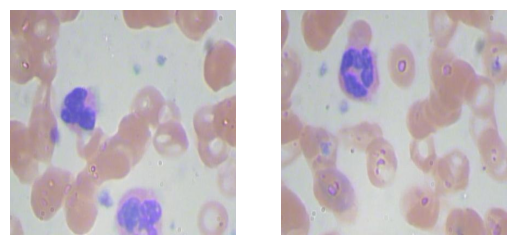

In [97]:
imagen1 = imread(list_train[20])
imagen2 = imread(list_train[21])

fig, ax = plt.subplots(1,2)
# Usen esta notación para hacer los subplots 
# (recuerden que para acceder a cada elemento se puede hacer como si fuera un array: ax[idx])
ax[0].imshow(imagen1, cmap='gray')
ax[0].axis('off')

ax[1].imshow(imagen2, cmap='gray')
ax[1].axis('off')

plt.show()

In [99]:
assert(not ax[1].axison), 'No apago los ejes de la image 1'
assert(not ax[0].axison), 'No apago los ejes de la image 0'

#### 1.2 Importación de anotaciones
Como se habrán dado cuenta las anotaciones están en un formato que probablemente no hayan usado nunca, un archivo *.json*. Estos archivos contienen una gran cantidad de información, tanto de la base de datos como de las imagenes y las anotaciones en si. El primer paso para poder explorarlas es poder hacer la importación de estos archivos y abrir el diccionario que se encuentra en su interior. Para ello use la siguiente celda manteniendo los nombres de las variables (pueden **apoyarse** en el codigo y la explicacion en esta pagina: https://www.geeksforgeeks.org/json-load-in-python/).

> **recomendaciones:** Revisen en primer lugar que tipo de objeto es el archivo que acaban de abrir. Revisen cuales son sus elementos y que contiene cada uno de ellos. Observen que compone cada una de las partes de interés que tiene su archivo.

In [101]:
dict_train = json.load(open('data_mp1/BCCD/train/_annotations.coco.json')) # variable que tendrá el diccionario de las anotaciones de la carpeta de train
dict_val = json.load(open('data_mp1/BCCD/valid/_annotations.coco.json')) # variable que tendrá el diccionario de las anotaciones de la carpeta de val
dict_test = json.load(open('data_mp1/BCCD/test/_annotations.coco.json')) # variable que tendrá el diccionario de las anotaciones de la carpeta de test

In [ ]:
# Utilicen esta celda para poder imprimir y explorar las anotaciones.

print(type(dict_train))
print(dict_train.keys())

print(type(dict_val))
print(dict_val.keys())

print(type(dict_test))
print(dict_test.keys())

#Todos tienen las mismas llaves,pude sólo hacerlo pa uno LOL

<class 'dict'>
dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])
<class 'dict'>
dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])
<class 'dict'>
dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])


In [105]:
assert(type(dict_train)==dict), 'Las anotaciones deben ser un diccionario'
assert(type(dict_val)==dict), 'Las anotaciones deben ser un diccionario'
assert(type(dict_test)==dict), 'Las anotaciones deben ser un diccionario'

assert 'images' in dict_train.keys(), 'Las anotaciones deben tener la llave images'
assert 'images' in dict_val.keys(), 'Las anotaciones deben tener la llave images'
assert 'images' in dict_test.keys(), 'Las anotaciones deben tener la llave images'

In [106]:
assert(np.isclose(len(dict_train['images']), len(list_train))), 'La cantidad de imagenes de anotacion deben ser iguales que las de la base de datos'
assert(np.isclose(len(dict_val['images']), len(list_val))), 'La cantidad de imagenes de anotacion deben ser iguales que las de la base de datos'
assert(np.isclose(len(dict_test['images']), len(list_test))), 'La cantidad de imagenes de anotacion deben ser iguales que las de la base de datos'

## Parte 2: Visualización de imagenes

Como pudieron observar anteriormente y del contexto del problema, estamos tratando una tarea de detección. La intuición inicial sería basarnos en color, ya que los elementos se distinguen por la tinción que tienen en las imagenes. Para esto tenemos que, en primer lugar, poder observar las anotaciones exactamente donde se encuentran respecto a el objeto de interés y, en un segundo momento, hacer una exploración de los diferentes canales de color para así poder escoger el canal o los canales que mejor permitan distinguir el objeto de interes.

### 2.1 Visualización de anotaciones
Inicialmente es importante visualizar las anotaciones, esto se debe a que se está tratando con una tarea visual. Esto nos puede ayudar a ver que tan cercanas son las anotaciones a el objeto, es decir, en este caso, si está sobre el nucleo de la celula o se encuentra al rededor de la celula o incluso un poco mas de espacio al rededor esta. Para este proposito vamos a realizar un subplot de **4 filas por 2 columnas** donde la primera columna contenga las imagenes originales y las versiones anotadas de dichas imagenes. 
Recuerden usar ``fig, ax = plt.subplots(n_rows,n_cols)`` para hacerlo, manteneniendo ``ax``.

Primero, cree una función que reciba de input el diccionario de anotaciones y un path de la imagen a plotear. Debe retornar una imagen con la bounding box de la anotación correspondiente.

**Pasos a seguir:**

> - Lea la imagen del path de entrada y guardelo en una variable.

> - El diccionario de anotacion tiene una llave "images" que retorna unaa lista de diccionarios. Estos diccionarios tienen una llave "file_name" que retorna el nombre de la imagen y una llave "id" que retorna un numero entero. Encuentre el **image_id** que corresponda a la imagen del path de entrada.

> - El diccionario de anotaciones tiene una llave "annotations" que retorna una lista de diccionarios. Busque el diccionario cuya llave "image_id" sea igual al **id** de la imagen de entrada y con la llave "category_id" igual a 3 (la categoria de los globulos blancos).

> - De este ultimo diccionario, use la llave "bbox" para obtener una lista de 4 numeros [X,Y,W,H] donde X,Y son las coordenadas de la esquina superior izquierda de la bounding box y W,H son el tamaño del ancho y alto de la caja. 

> - Use la función cv2.rectangle(image, start_point, end_point, (255,0,0), 2) para obtener una imagen con una bounding box dibujada y retornela junto con las coordenadas del bbox. Recuerde que las coordenadas deben ser enteras.

In [134]:
def Graficar_bbox(dict_anotaciones, path):
    imagen = imread(path)
    archivo = os.path.basename(path)

    image_id = None
    for img in dict_anotaciones['images']:
        if img['file_name'] == archivo:
            image_id = img['id']
            break

    bbox = None #Bounding box
    for anotacion in dict_anotaciones['annotations']:
        if (anotacion['image_id'] == image_id) and (anotacion['category_id'] == 3):
            bbox = anotacion['bbox']
            break
    if bbox is None: #Me salió un error al graficar, a ver si con esto se quita
        return imagen, None
    
    X, Y, W, H = map(int, bbox)
    img_bbox = cv2.rectangle(imagen.copy(), (X,Y), ((X+W), (Y+H)), (255,0,0),2)
    return img_bbox, [X,Y,W,H]

In [136]:
path = list_train[0]
print(path.split('/')[-1])

# el último assert me daba error porque las barras inclinadas del path me dan al
# revés, puedo usar lo que usé antes os.path para cambiar esoo

print(os.path.basename(path))

data_mp1\BCCD\train\BloodImage_00001_jpg.rf.ee79407f4ce4abd4fc56f42c176d324b.jpg
BloodImage_00001_jpg.rf.ee79407f4ce4abd4fc56f42c176d324b.jpg


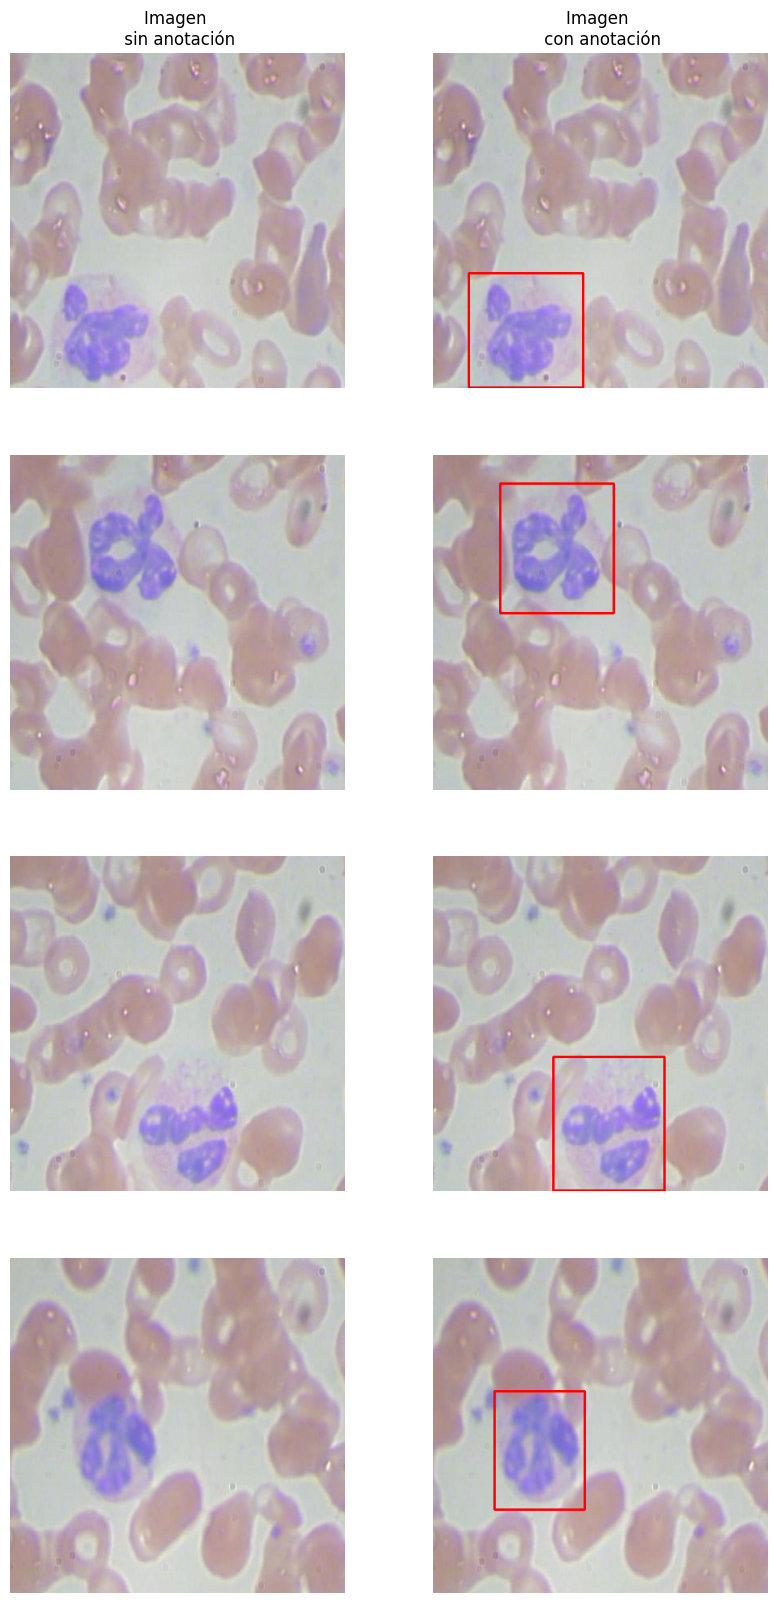

In [135]:
plt.rcParams['figure.figsize'] = [10, 20] # por cuestiones de visualización vamos a alterar este parametro
fig, ax = plt.subplots(4,2)#filas,#columnas
ax[0,0].set_title('Imagen \n sin anotación')
ax[0,1].set_title('Imagen \n con anotación')

path1 = list_train[0]
img1 = imread(path1)
ax[0,0].imshow(img1)
ax[0,0].axis("off")
img1_bbox, bbox1 = Graficar_bbox(dict_train, path1)
ax[0,1].imshow(img1_bbox)
ax[0,1].axis("off")

path2 = list_train[1]
img2 = imread(path2)
ax[1,0].imshow(img2)
ax[1,0].axis("off")
img2_bbox, bbox2 = Graficar_bbox(dict_train, path2)
ax[1,1].imshow(img2_bbox)
ax[1,1].axis("off")

path3 = list_train[2]
img3 = imread(path3)
ax[2,0].imshow(img3)
ax[2,0].axis("off")
img3_bbox, bbox3 = Graficar_bbox(dict_train, path3)
ax[2,1].imshow(img3_bbox)
ax[2,1].axis("off")

path4 = list_train[3]
img4 = imread(path4)
ax[3,0].imshow(img4)
ax[3,0].axis("off")
img4_bbox, bbox4 = Graficar_bbox(dict_train, path4)
ax[3,1].imshow(img4_bbox)
ax[3,1].axis("off")

plt.show()

In [137]:
for i in range(4):
    for j in range(2):
        assert(not ax[i,j].axison), 'Los ejes deben estar apagados'
assert(np.shape(ax) == (4,2)), 'EL subplot no es 4,2'

In [ ]:
bbox=Graficar_bbox(dict_train,list_train[0])[1]
assert bbox[0]==44, 'su coordenada de filas de la esquina es erronea'
assert bbox[1]==273, 'su coordenada de columnas de la esquina es erronea'
assert bbox[2]==142, 'El ancho de la caja es erroneo'
assert bbox[3]==142, 'El alto de la caja es erroneo'

#FUNCIONOOOO

### 2.2 Exploración por canales

Ahora que ya hemos visualizado las anotaciones tenemos conocimiento de como lucen estas y exactamente como se relacionan con el objeto, lo cual nos ayudará a realizar el proceso de forma automatica mas preciso. Sin embargo, como saben, la aproximación que vamos a realizar para poder resolver esta tarea es mediante segmentación y esta será basada en la información de color que tenemos disponible. Debido a esto, vamos a usar las 4 imagenes que usamos anteriormente y vamos a realizar un subplot con la siguiente forma:

<div>
<img src="canales.jpg" width="500"/>
</div>

> **consejos**: 
> - Recuerden que los subplots deben estar con sus respectivos titulos en cada fila para saber a que pertenece cada imagen. 
> - Tengan presente que deben utilizar el mapa de color de grises al presentar una imagen de un solo canal a no ser que se trate de una grafica. Para esto pueden usar el comando ``cmap`` al momento de graficar
> - Recuerden quitar los ejes de las imagenes

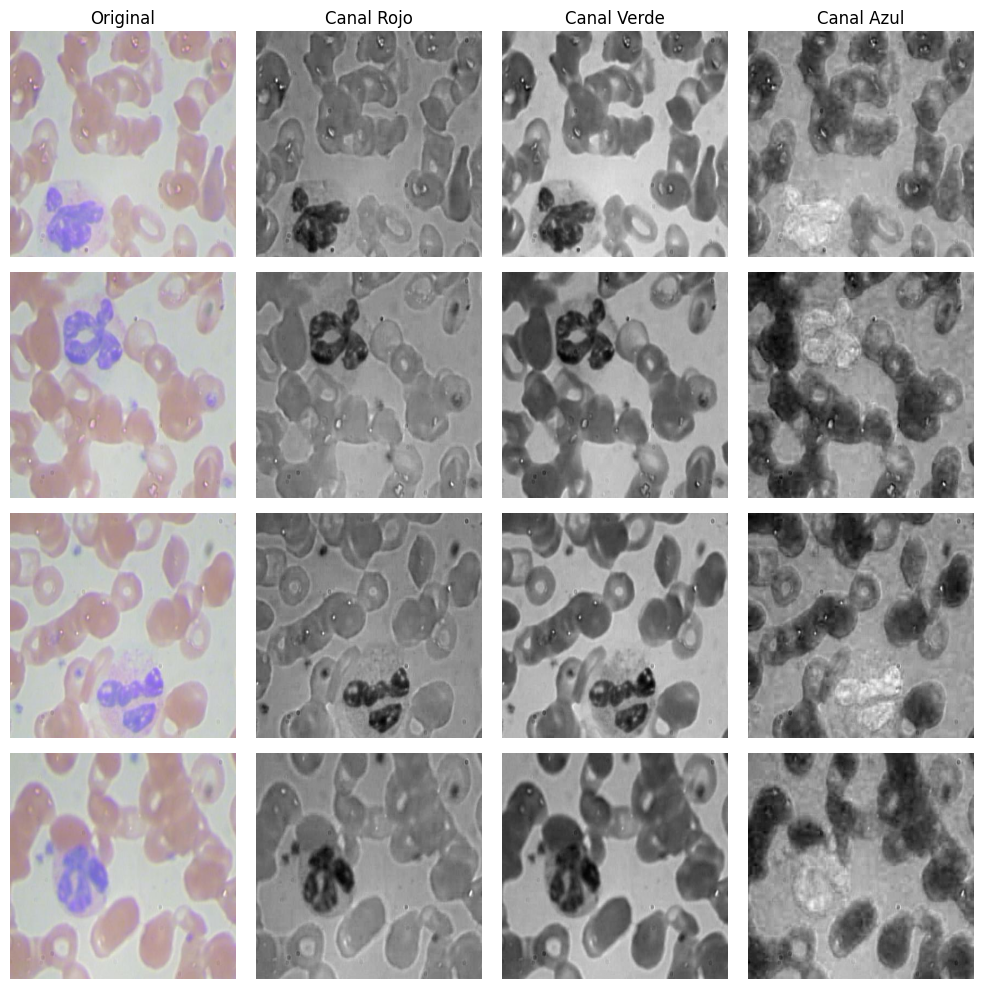

In [146]:
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots(4, 4)

column_titles = ['Original', 'Canal Rojo', 'Canal Verde', 'Canal Azul']

img1 = imread(list_train[0]) #original
ax[0, 0].imshow(img1)
ax[0, 0].set_title(column_titles[0])
ax[0, 0].axis('off')

ax[0, 1].imshow(img1[:, :, 0], cmap='gray')
ax[0, 1].set_title(column_titles[1])
ax[0, 1].axis('off')

ax[0, 2].imshow(img1[:, :, 1], cmap='gray')
ax[0, 2].set_title(column_titles[2])
ax[0, 2].axis('off')

ax[0, 3].imshow(img1[:, :, 2], cmap='gray')
ax[0, 3].set_title(column_titles[3])
ax[0, 3].axis('off')

img2 = imread(list_train[1]) #original
ax[1, 0].imshow(img2)
ax[1, 0].axis('off')

ax[1, 1].imshow(img2[:, :, 0], cmap='gray')
ax[1, 1].axis('off')

ax[1, 2].imshow(img2[:, :, 1], cmap='gray')
ax[1, 2].axis('off')

ax[1, 3].imshow(img2[:, :, 2], cmap='gray')
ax[1, 3].axis('off')

img3 = imread(list_train[2]) #original
ax[2, 0].imshow(img3)
ax[2, 0].axis('off')

ax[2, 1].imshow(img3[:, :, 0], cmap='gray')
ax[2, 1].axis('off')

ax[2, 2].imshow(img3[:, :, 1], cmap='gray')
ax[2, 2].axis('off')

ax[2, 3].imshow(img3[:, :, 2], cmap='gray')
ax[2, 3].axis('off')

img4 = imread(list_train[3]) #original
ax[3, 0].imshow(img4)
ax[3, 0].axis('off')

ax[3, 1].imshow(img4[:, :, 0], cmap='gray')
ax[3, 1].axis('off')

ax[3, 2].imshow(img4[:, :, 1], cmap='gray')
ax[3, 2].axis('off')

ax[3, 3].imshow(img4[:, :, 2], cmap='gray')
ax[3, 3].axis('off')

plt.tight_layout()
plt.show()

In [147]:
assert(np.shape(ax) == (4,4)), 'El subplot debe ser 4x4'

for i in range(4):
    for j in range(4):
        assert(not ax[i,j].axison), 'Los ejes deben estar apagados'

### 2.3 Umbrales

Como dijimos con anterioridad, usaremos un metodo de segmentación para resolver el problema de detección de globulos blancos. Hagamos una pequeña implementación de la segmentación de globulos basado en color utilizando las intensidades del canal azul.

Veamos ahora una manera más sencilla de umbralizar una imagen que utilizando un for. Para eso Utilice el operador > 215 para cambiar todos los pixeles mayores a 215 por un True y el resto por un False. Muestre la imagen resultante.

In [148]:
# Por favor no modificar la imagen. Si la modifican pueden tener errores luego.
img=imread(list_train[0])

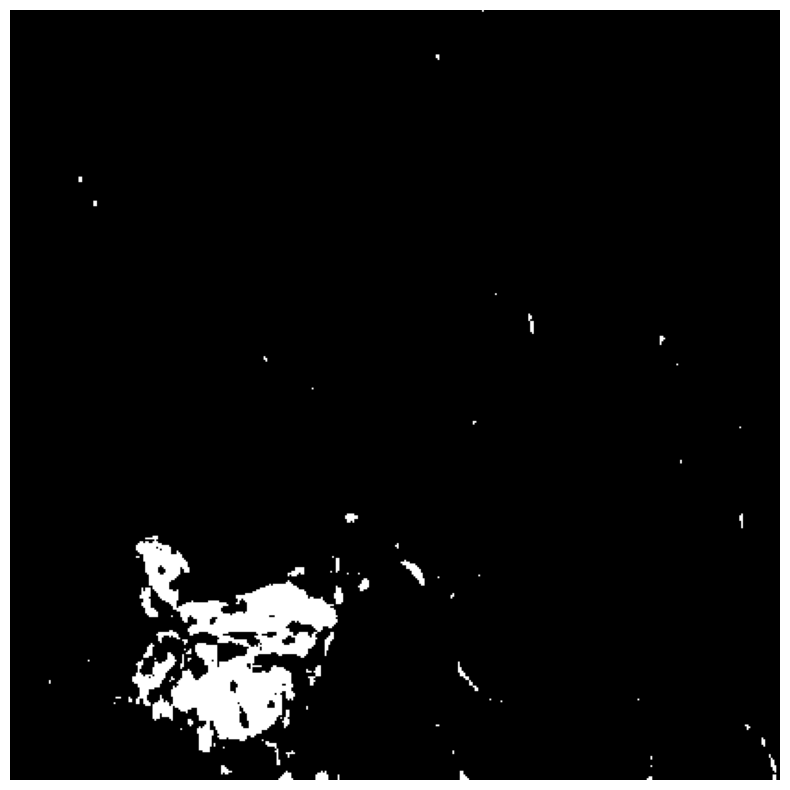

5597


In [161]:
new_im= (img[:,:,2])> 215 #imagen umbralizada de la segunda forma

plt.imshow(new_im, cmap='gray')
plt.axis('off')
plt.show()

print(np.sum(new_im))

In [162]:
assert np.isclose(np.sum(new_im),5708) or np.isclose(np.sum(new_im), 5597), 'La umbralización es erronea'

En el siguiente paso utilizaremos una función llamada [inRange](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981) de la librería OpenCV. Esta función nos permitira no solamente realizar una segmentación cómo la anterior si no combinarla en los diferentes canales de la imagen. La documentación la pueden encontrar en el siguiente [enlace](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981). Basicamente esta función utiliza dos arreglos o escalares que serán los límites inferiores y límites superiores para realizar la segmentación. Si la entrada son dos escalar (uno para el límite inferior y otro para el límite superior) entonces cada uno de los canales utiliza los los mismos valores. Mientras que si la entrada es dos arreglos cada canal tendrá un límite inferior y otro superior.

La idea es que realicen algunos experimentos y encuentren la mejor combinación de límites inferiores y superiores para la segmentación. Recuerden que hasta ahora no estamos utilizando métricas por lo que su respuesta debe basarse en los resultados cualitativos.

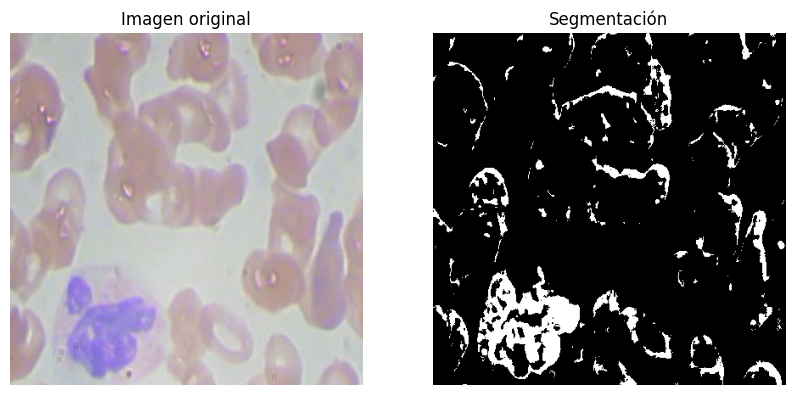

In [172]:
#experimentacion (?)

inferior = np.array([150,100,180])
superior = np.array([255,180,255])

segmentation = cv2.inRange(img, inferior, superior)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(segmentation, cmap="gray")
plt.title("Segmentación")
plt.axis("off")
plt.show()

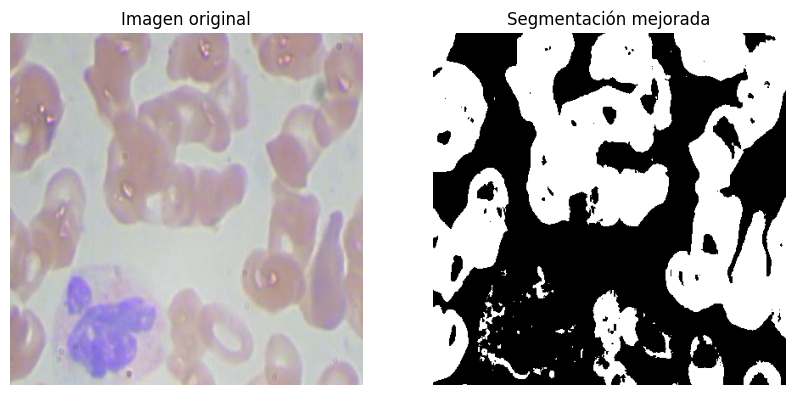

In [169]:
inferior_f = np.array([120,80,120])
superior_f = np.array([255,180,200])

segmentation = cv2.inRange(img, inferior_f, superior_f) # Guarde acá su mejor experimento
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Imagen original")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(segmentation, cmap="gray")
plt.title("Segmentación mejorada")
plt.axis("off")
plt.show()

In [173]:
assert np.sum(segmentation) > 0, 'La segmentación es erronea'

### Parte 3: Base de datos

Una vez se tienen disponibles los archivos con las imagenes y las anotaciones es importante hacer una revisión de la base de datos. Esto es importante ya que se debe conocer cuantas imagenes, cuantas anotaciones y cuales anotaciones  por imagen por carpeta y en total. Esta parte tiene una especial relevancia ya que en muchas ocasiones vamos a encontrarnos con bases de datos que tengan una distribución mal hecha (como pocos datos de entrenamiento) o estén desbalanceados, teniendo mas anotaciones en promedio en una carpeta. Tener pocas imagenes en entrenamiento o no tener una suficiente representación de una clase en alguna carpeta puede afectar el desempeño de nuestro modelo. 

Adicionalmente, debemos entender nuestro archivo de anotaciones. Como vimos con anterioridad, estos son diccionarios que almacenan la información necesaria para resolver nuestro problema de dedtección. Exploraremos la estructura de nuestro archivo de anotaciones y algunas estadisticas importantes.

In [186]:
train_images = len(dict_train['images']) # variable que tendrá el numero de imagenes en la carpeta de entrenamiento
val_images = len(dict_val['images']) # variable que tendrá el numero de imagenes en la carpeta de validacion
test_images = len(dict_test['images']) # variable que tendrá el numero de imagenes en la carpeta de prueba

def contar_anotaciones(dict_anotaciones, clase_id):
    contador = 0
    for anotacion in dict_anotaciones['annotations']:
        if anotacion['category_id'] == clase_id:
            contador += 1
    return contador

train_anots_1 = contar_anotaciones(dict_train, 1) # variable que tendrá el numero de anotaciones de la clase 1 en la carpeta de entrenamiento
val_anots_1 = contar_anotaciones(dict_val, 1) # variable que tendrá el numero de anotaciones de la clase 1 en la carpeta de validacion
test_anots_1 = contar_anotaciones(dict_test, 1) # variable que tendrá el numero de anotaciones de la clase 1 en la carpeta de prueba

train_anots_2 = contar_anotaciones(dict_train, 2) # variable que tendrá el numero de anotaciones de la clase 2 en la carpeta de entrenamiento
val_anots_2 = contar_anotaciones(dict_val, 2) # variable que tendrá el numero de anotaciones de la clase 2 en la carpeta de validacion
test_anots_2 = contar_anotaciones(dict_test, 2) # variable que tendrá el numero de anotaciones de la clase 2 en la carpeta de prueba

train_anots_3 = contar_anotaciones(dict_train, 3) # variable que tendrá el numero de anotaciones de la clase 3 en la carpeta de entrenamiento
val_anots_3 = contar_anotaciones(dict_val, 3) # variable que tendrá el numero de anotaciones de la clase 3 en la carpeta de validacion
test_anots_3 = contar_anotaciones(dict_test, 3) # variable que tendrá el numero de anotaciones de la clase 3 en la carpeta de prueba

Debemos comprobar si alguna imagen de nuestra base de datos no tiene la clase 3 ya que es nuestra clase de interes. A su vez, debemos comprobar cuantos objetos de nuestra clase de interes se encuentran en una imagen, si existe más de una celula blanca en nuestras imagenes, debemos ajustar nuestra metodología de detección.

El proceso de analsis de nuestras anotaciones puede ser algo complicado si nunca ha trabajado con diccionarios o un alto volumen de datos. Les proponemos el siguiente pseudo-codigo.

**Pasos:** 

> - La llave "anotaciones" del json retorna una lista de dissionarios. Estos diccionarios tienen un "image_id" que es el identificador de la imagen y un "category_id" que es la clase del objeto. Haga una lista que contenga solo los diccionarios de la category id =3. 

> - Haga una lista de 0s con np.zeros() con el tamaño de la cantidad de imagenes de entrenamiento (o validacion o test).

> - Recorra todos los diccionarios del primer paso y guarde el image_id en una variable. Este image_id es un entero.

> - Sume 1 en la posición del image_id en la lista de 0s. De esta forma sabremos cuantos objetos de la categoria 3 se encuentran en cada imagen sabiendo que la image_id=5 tendrá la posición 5 en nuestro vector de 0s (y así con todas las imagenes).

> - Use np.min() o np.max() en el vector de 0s.

In [187]:
def contar_clase3(dict, num_imagenes):
    anotaciones_clase3 = []

    for anotacion in dict["annotations"]:
        if anotacion["category_id"] == 3:
            anotaciones_clase3.append(anotacion)

    conteo = np.zeros(num_imagenes, dtype=int)
    for anotacion in anotaciones_clase3:
        img_id = anotacion['image_id']
        conteo[img_id] += 1

    return np.min(conteo), np.max(conteo), conteo

#min_train_anots_3 = #variable que tendrá el minimo de elementos de la clase 3 en una imagen en entrenamiento
#min_val_anots_3 = min_val_anots_3, _, _ = contar_clase3(dict_val, val_images) # variable que tendrá el minimo de elementos de la clase 3 en una imagen en validacion
#min_test_anots_3 = min_test_anots_3, _, _ = contar_clase3(dict_test, test_images) # variable que tendrá el minimo de elementos de la clase 3 en una imagen en prueba


In [188]:
#max_train_anots_3= _, max_train_anots_3, _ = contar_clase3(dict_train, train_images) # variable que tendrá el maximo de elementos de la clase 3 en una imagen en entrenamiento
#max_val_anots_3= _, max_val_anots_3, _ = contar_clase3(dict_val, val_images) # variable que tendrá el maximo de elementos de la clase 3 en una imagen en validacion
#max_test_anots_3= _, max_test_anots_3, _ = contar_clase3(dict_test, test_images) # variable que tendrá el maximo de elementos de la clase 3 en una imagen en prueba

min_train_anots_3, max_train_anots_3, conteo_train = contar_clase3(dict_train, train_images)
min_val_anots_3, max_val_anots_3, conteo_val = contar_clase3(dict_val, val_images)
min_test_anots_3, max_test_anots_3, conteo_test = contar_clase3(dict_test, test_images)

In [ ]:
print("train_anots_1:", train_anots_1)
print("val_anots_1:", val_anots_1)
print("test_anots_1:", test_anots_1)
print("Producto:", train_anots_1*val_anots_1*test_anots_1)

#Había puesto el contador dentro del for y no me servía!!!

train_anots_1: 225
val_anots_1: 68
test_anots_1: 26
Producto: 397800


In [190]:
assert type(train_images)==int, 'El numero de imagenes de entrenamiento deberia ser entero'
assert type(val_images)==int, 'El numero de imagenes de validacion deberia ser entero'
assert type(test_images)==int, 'El numero de imagenes de test deberia ser entero'

assert type(train_anots_1)==int, 'El numero de anotaciones de entrenamiento deberia ser entero'
assert type(val_anots_1)==int, 'El numero de anotaciones de validacion deberia ser entero'
assert type(test_anots_1)==int, 'El numero de anotaciones de test deberia ser entero'

print ("{:<8}             | {:<15} {:<20}".format('Fold','Total images','Total annotations'))
print ('----------------------------------------------------------------------------')
print ("{:<20} | {:<15} {:<20}".format('Train category 1',train_images,train_anots_1))
print ("{:<20} | {:<15} {:<20}".format('Valid category 1',val_images,val_anots_1))
print ("{:<20} | {:<15} {:<20}".format('Test category 1',test_images,test_anots_1))

assert train_images<train_anots_1, 'Deberían haber mas anotaciones de la clase 1 en entrenamiento que el total de imagenes'
assert val_images<val_anots_1, 'Deberían haber mas anotaciones de la clase 1 en entrenamiento que el total de imagenes'
assert test_images>test_anots_1, 'Deberían haber menos anotaciones de la clase 1 en entrenamiento que el total de imagenes'

assert np.isclose(train_anots_1*val_anots_1*test_anots_1,397800), 'Algun valor de la cantidad de anotaciones esta mal'

Fold                 | Total images    Total annotations   
----------------------------------------------------------------------------
Train category 1     | 224             225                 
Valid category 1     | 65              68                  
Test category 1      | 31              26                  


In [191]:
assert type(train_anots_2)==int, 'El numero de anotaciones de entrenamiento deberia ser entero'
assert type(val_anots_2)==int, 'El numero de anotaciones de validacion deberia ser entero'
assert type(test_anots_2)==int, 'El numero de anotaciones de test deberia ser entero'

print ("{:<8}             | {:<15} {:<20}".format('Fold','Total images','Total annotations'))
print ('----------------------------------------------------------------------------')
print ("{:<20} | {:<15} {:<20}".format('Train category 2',train_images,train_anots_2))
print ("{:<20} | {:<15} {:<20}".format('Valid category 2',val_images,val_anots_2))
print ("{:<20} | {:<15} {:<20}".format('Test category 2',test_images,test_anots_2))

assert train_images<train_anots_2, 'Deberían haber mas anotaciones de la clase 2 en entrenamiento que el total de imagenes'
assert val_images<val_anots_2, 'Deberían haber mas anotaciones de la clase 2 en entrenamiento que el total de imagenes'
assert test_images<test_anots_2, 'Deberían haber mas anotaciones de la clase 2 en entrenamiento que el total de imagenes'

assert np.isclose(train_anots_2*val_anots_2*test_anots_2,670077408), 'Algun valor de la cantidad de anotaciones esta mal'

Fold                 | Total images    Total annotations   
----------------------------------------------------------------------------
Train category 2     | 224             2569                
Valid category 2     | 65              741                 
Test category 2      | 31              352                 


In [192]:
assert type(train_anots_3)==int, 'El numero de anotaciones de entrenamiento deberia ser entero'
assert type(val_anots_3)==int, 'El numero de anotaciones de validacion deberia ser entero'
assert type(test_anots_3)==int, 'El numero de anotaciones de test deberia ser entero'

print ("{:<8}             | {:<15} {:<20} {:<20} {:<20}".format('Fold','Total images','Total annotations', 'Min annotations', 'Max annotations'))
print ('----------------------------------------------------------------------------')
print ("{:<20} | {:<15} {:<20} {:<20} {:<20}".format('Train category 3',train_images,train_anots_3,min_train_anots_3,max_train_anots_3))
print ("{:<20} | {:<15} {:<20} {:<20} {:<20}".format('Valid category 3',val_images,val_anots_3,min_val_anots_3,max_val_anots_3))
print ("{:<20} | {:<15} {:<20} {:<20} {:<20}".format('Test category 3',test_images,test_anots_3,min_test_anots_3,max_test_anots_3))

assert train_images<train_anots_3, 'Deberían haber mas anotaciones de la clase 3 en entrenamiento que el total de imagenes'
assert val_images==val_anots_3, 'Deberían haber igual cantidad de anotaciones de la clase 3 en entrenamiento que el total de imagenes'
assert test_images<test_anots_3, 'Deberían haber mas anotaciones de la clase 3 en entrenamiento que el total de imagenes'

assert np.isclose(train_anots_3*val_anots_3*test_anots_3,486720), 'Algun valor de la cantidad de anotaciones esta mal'

assert min_train_anots_3+min_val_anots_3+min_test_anots_3==2, 'Algun valor de minimo esta mal'
assert max_train_anots_3+max_val_anots_3+max_test_anots_3==6, 'Algun valor de maximo esta mal'

Fold                 | Total images    Total annotations    Min annotations      Max annotations     
----------------------------------------------------------------------------
Train category 3     | 224             234                  1                    2                   
Valid category 3     | 65              65                   0                    2                   
Test category 3      | 31              32                   1                    2                   


## Entregables
Los entregables para esta primera entrega son los siguientes:

- Jupyter notebook (.ipynb): El notebook debe estar completamente resuelto. Recuerden que la nota depende del correcto funcionamiento de su código.

- Archivo de texto (.txt): Un archivo de texto con las secciones de código del Jupyter notebook. Para más información sobre cómo convertir las secciones de código de su Jupyter notebook a un archivo de texto, pueden ver el video disponible en el siguiente [enlace](https://uniandes-edu-co.zoom.us/rec/share/QOxUUIw7Uz9DsnKPyftOXZgM4bx5d7KHMYK-dqvGnkyJ2GfqvT7NU3lhQc0NtNSU.jveWB2H34S4uLIoB).

- Informe (.pdf): El informe constará de responder las preguntas, además, asegúrese de incluir los elementos adicionales, como subplots, gráficos, tablas o cualquiera elemento adicional que se mencione. Toda la información sobre preguntas y elementos adicionales está en la siguiente sección de informe. El informe debe utilizar el formato que puede encontrar siguiente [enlace](https://github.com/cvpr-org/author-kit). Si tiene dudas de cómo utilizar el formato puede preguntar al Asistente Graduado.

## Informe 
La extensión máxima es de 4 páginas. Las preguntas a responder en su informe son las siguientes.

### Revisión de estadisticas
Una parte importante en toda tarea de este campo, es no solo observar los problemas que puedan presentarse en la base de datos, sino poder comprender completamente cual es el proposito de cada uno de los elementos y por que deben cumplir con ciertas caracteristicas. Para poder comprender esto usted debe estar en la capacidad de responder las siguientes preguntas, por lo que debe responderlas en su informe:

- ¿Cuál es la función de cada uno de los sub-conjuntos de una base de datos? 
- ¿Hay una clase en la base de datos que es predominante sobre las otras? ¿Si la hay cuál es esa clase?
- ¿La base de datos está distribuida correctamente en cada uno de los set de datos (train, validación y test)? **Consejo:** Revisar si el porcentaje de cada categoría es similar en cada set de datos.
- En la base de datos hay algunas imágenes que no tienen ningún glóbulo blanco. Dado que lo que queremos detectar son estos últimos ¿estas imágenes, sin glóbulos blancos, tienen alguna función dentro de la base de datos o su utilidad es nula?
- Realice la presentación de las estadísticas de la base de datos de una oportuna en el informe. Recuerde que puede utilizar diversos métodos de visualización como los diagramas de barras, histogramas, entre otros.
- Finalmente deben realizar un gráfico que muestre la organización de las anotaciones (archivo _annotations.coco.json). Es decir, deben enunciar que elementos (keys) tienen y que contiene cada elemento. Además en caso de que los elementos al interior también sean diccionarios, deben enunciar los elementos de estos. Explique en detalle que es el image_id y el category_id ¿Cuál es su utilidad?.

### Visualización de imágenes
Como deben recordar, uno de los propositos de esta entrega era aproximarnos tambien al problema en si. Debido a esto deben responder las siguientes preguntas sobre este problema y las imágenes a usar.

- ¿Qué canal parece tener mejores resultados? ¿Utilizar varios canales para hacer una umbralización final puede dar mejores resultados? Explique su razonamiento.
- Presente los resultados de los experimentos más importantes que realizó con la función inRange. Realice un análisis de esos resultados.
- Investigue un algoritmo sencillo que pueda ser utilizado para resolver esta tarea. Deben ser técnicas que utilicen lo aprendido hasta ahora o todo lo utilizado en el primer módulo del curso. **Nota**: Recuerden que hasta ahora no hemos resuelto la tarea final que es detección. Solo hemos hecho segmentación con la intención de que esto nos ayude a detectar los glóbulos blancos.
- Finalmente deben poner cada uno de los subplots que realizamos, acompañados de una breve descripción de estos. Recuerden que una descripción es diferente a un análisis.

In [1]:
from utils import *
converter("Entrega 1")